In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### GDAL
La Open Source Geospatial Foundation, es una organización no gubernamental cuya misión es dar soporte y promover el desarrollo colaborativo de tecnologías geoespaciales y datos abiertos

GDAL,Geonetwork,Geoserver,Proj,GEOS,PostGIS,OpenLayers,Leaflet,QGIS,GvSIG,Grass

GDAL,Geospatial Data Abstraction Library o GDAL es una biblioteca de software para la lectura y escritura de formatos de datos geoespaciales, publicada bajo la MIT License por la fundación geoespacial de código abierto.

Importación 

In [0]:
from osgeo import gdal
import numpy as np

Apertura

In [47]:
ds = gdal.Open('/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif')
type(ds)

osgeo.gdal.Dataset

Metadato

In [48]:
print(gdal.Info(ds))

Driver: GTiff/GeoTIFF
Files: /content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif
Size is 6203, 5755
Coordinate System is:
GEOGCS["GCS_ITRF_1992",
    DATUM["ITRF_1992",
        SPHEROID["GRS_1980",6378137,298.257222101]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]
Origin = (-99.494414147794700,19.131678633950401)
Pixel Size = (0.000138888889000,-0.000138888889000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -99.4944141,  19.1316786) ( 99d29'39.89"W, 19d 7'54.04"N)
Lower Left  ( -99.4944141,  18.3323731) ( 99d29'39.89"W, 18d19'56.54"N)
Upper Right ( -98.6328864,  19.1316786) ( 98d37'58.39"W, 19d 7'54.04"N)
Lower Right ( -98.6328864,  18.3323731) ( 98d37'58.39"W, 18d19'56.54"N)
Center      ( -99.0636503,  18.7320259) ( 99d 3'49.14"W, 18d43'55.29"N)
Band 1 Block=6203x1 Type=Int16, ColorInterp=Gray
  NoData Value=32767
  Metadata:
    STATISTICS_COVARIANCES=267332.7996236944
    STATISTICS_SKIPFACT

In [49]:
print(ds.GetMetadata())
print(ds.GetDescription())

{'AREA_OR_POINT': 'Area'}
/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif


Sistema de referencia y proyección

In [50]:
print(ds.GetProjection())
print(ds.GetProjectionRef())
print(ds.GetGCPProjection())

GEOGCS["GCS_ITRF_1992",DATUM["ITRF_1992",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
GEOGCS["GCS_ITRF_1992",DATUM["ITRF_1992",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
GEOGCS["GCS_ITRF_1992",DATUM["ITRF_1992",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]


GeoTrasformación

**(xmin, w-e pixel res, rot x, ymax, rot y, n-s pixel res(-))**

In [51]:
ds.GetGeoTransform()

(-99.4944141477947,
 0.000138888889000001,
 0.0,
 19.1316786339504,
 0.0,
 -0.000138888889000001)

Caracteristicas Datos

In [52]:
print(ds.RasterXSize)
print(ds.RasterYSize)

6203
5755


Bandas

In [53]:
banda = ds.GetRasterBand(1) 
type(banda)

osgeo.gdal.Band

Datos númericos

In [54]:
data = banda.ReadAsArray()
print(data)
print(type(data))
print(data.shape)

[[32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 ...
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]]
<class 'numpy.ndarray'>
(5755, 6203)


**Graficación**

Matplotlib

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy.

Importación

In [0]:
import matplotlib.pyplot as plt

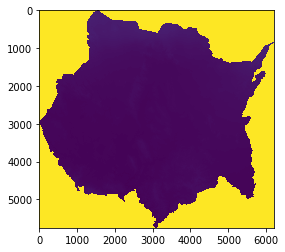

In [56]:
plt.imshow(data)

### Rasterio

Rasterio emplea GDAL de formato ráster. Sus funciones generalmente aceptan y devuelven numpy ndarrays. Rasterio está diseñado para que trabajar con datos ráster geoespaciales sea más productivo y divertido.

Instalación

In [57]:
!pip install rasterio

Importación

In [0]:
import rasterio

Apertura

In [0]:
ds2 = rasterio.open('/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif')             

Metadato

read_crs( ) 

Devuelve el CRS (coordinate reference system) almacenado del conjunto de datos GDAL

read_transform( ) 

Devuelve la GeoTransform GDAL almacenada (tupla)

In [60]:
print(ds2.read_crs())
print(ds2.width)
print(ds2.bounds)
print(ds2.get_transform())

GEOGCS["GCS_ITRF_1992",DATUM["ITRF_1992",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
6203
BoundingBox(left=-99.4944141477947, bottom=18.332373077755395, right=-98.6328863693277, top=19.1316786339504)
[-99.4944141477947, 0.000138888889000001, 0.0, 19.1316786339504, 0.0, -0.000138888889000001]


Datos númericos

In [61]:
data2 = ds2.read(1)
print(type(data2))
data2

<class 'numpy.ndarray'>


array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]], dtype=int16)

In [62]:
data2[2000:2500,2000:2500] # Obtener una región de la matriz

array([[1292, 1293, 1293, ..., 1622, 1633, 1644],
       [1291, 1292, 1292, ..., 1621, 1632, 1643],
       [1290, 1291, 1291, ..., 1620, 1631, 1642],
       ...,
       [1123, 1124, 1124, ..., 1539, 1536, 1532],
       [1123, 1124, 1124, ..., 1534, 1530, 1526],
       [1123, 1124, 1124, ..., 1530, 1525, 1520]], dtype=int16)

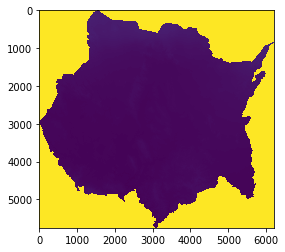

In [63]:
plt.imshow(data2)

No Data

In [64]:
import numpy as np
data2 = np.where(data2 == 32767,np.nan,data2)
print(data2)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [65]:
data2.shape

(5755, 6203)

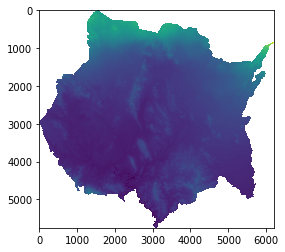

In [66]:
plt.imshow(data2)

Contour (Curvas de nivel)

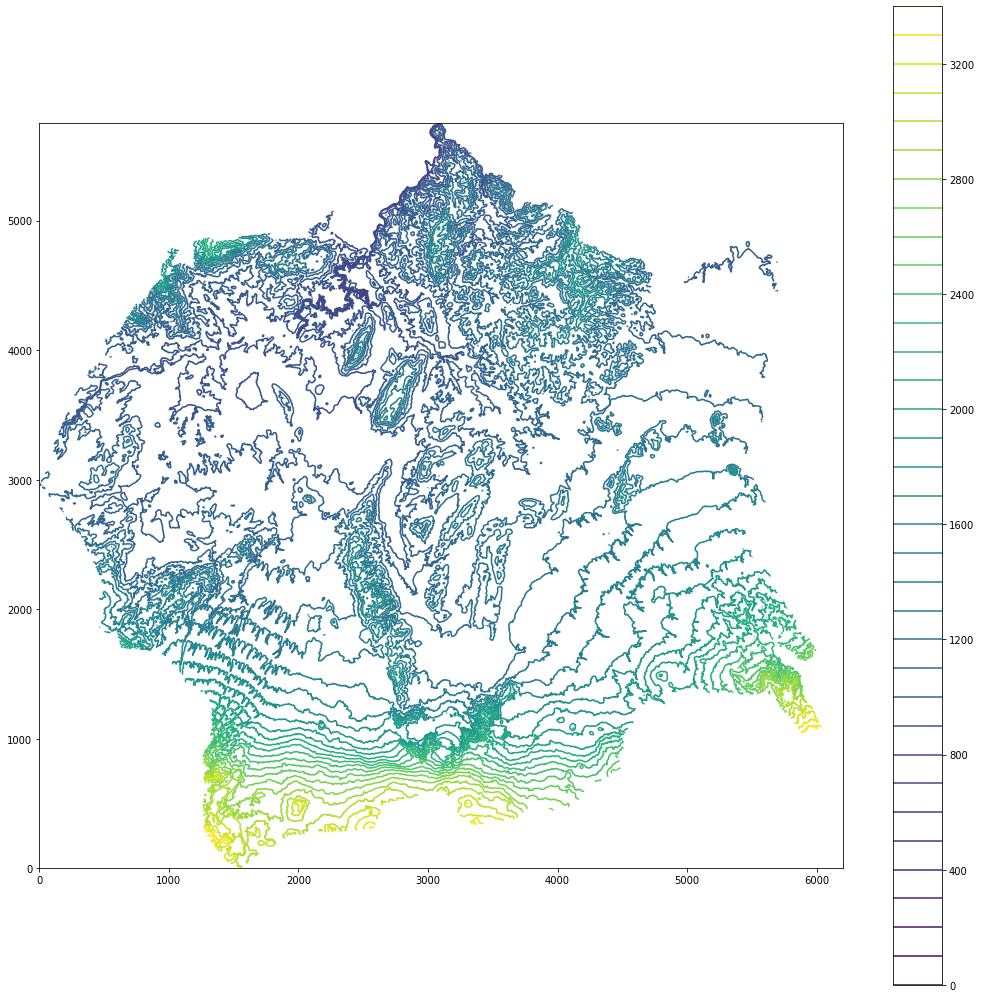

In [67]:
plt.figure(figsize = (18, 18))
plt.contour(data2,levels = list(range(0, 3500, 100)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

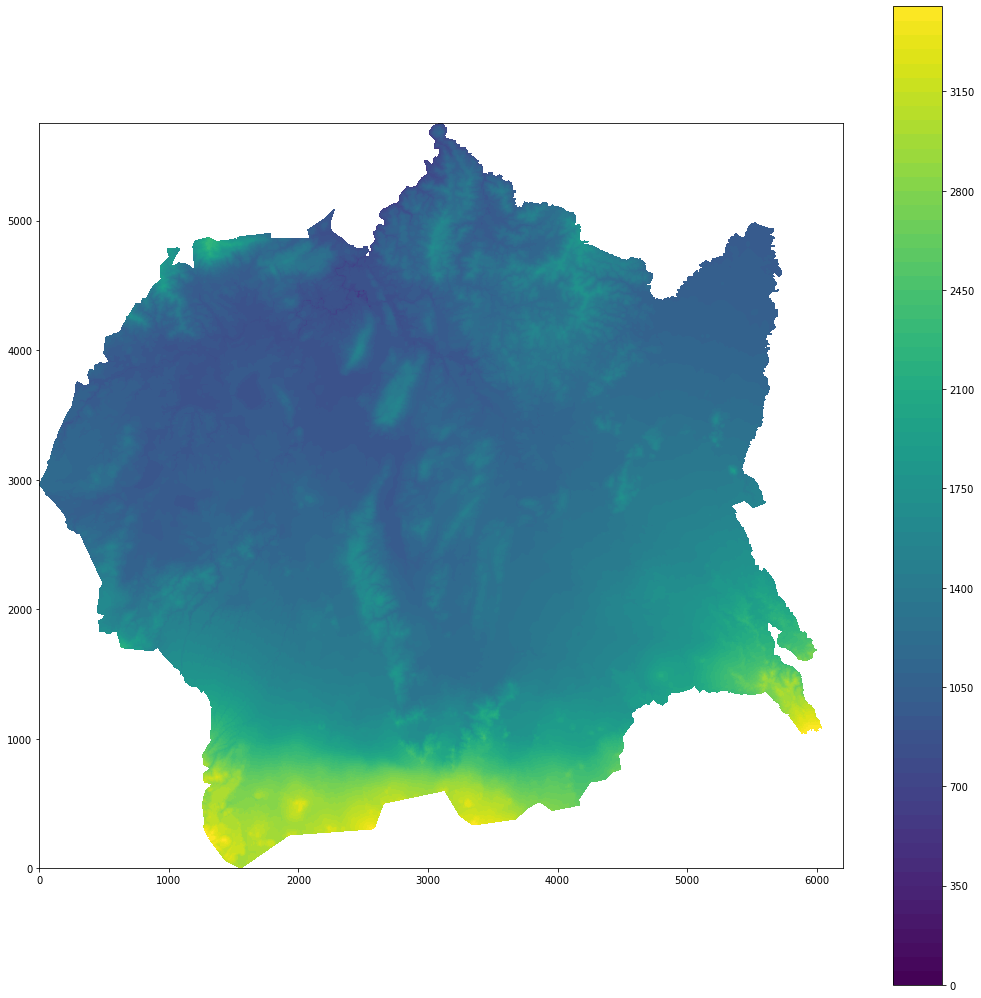

In [68]:
plt.figure(figsize = (18, 18))
plt.contourf(data2,levels = list(range(0, 3500, 50)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

Histograma

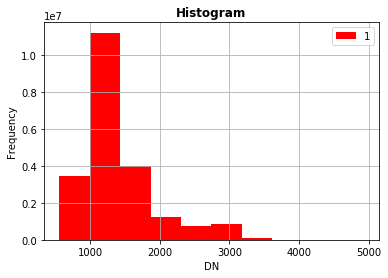

In [69]:
from rasterio.plot import show_hist
show_hist(ds2)

### **Ejercicio de aplicación**

1. Graficar de los valores (2000:2500 en X y 500:1000 en Y) y obtener curvas de nivel
2. Dar coordenadas extremas y obtener curvas de nivel
3. Dar coordenadas y obtener elevación

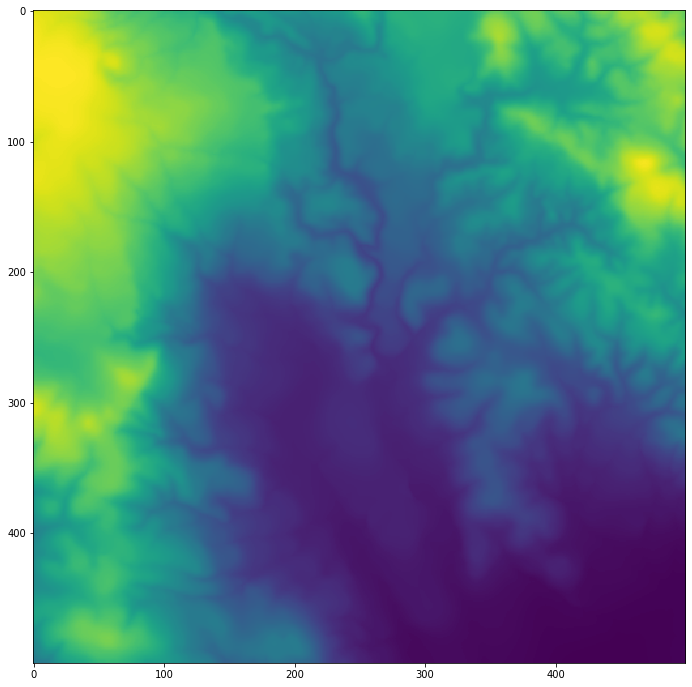

In [70]:
plt.figure(figsize = (12, 12))
plt.imshow(data[2000:2500,500:1000])

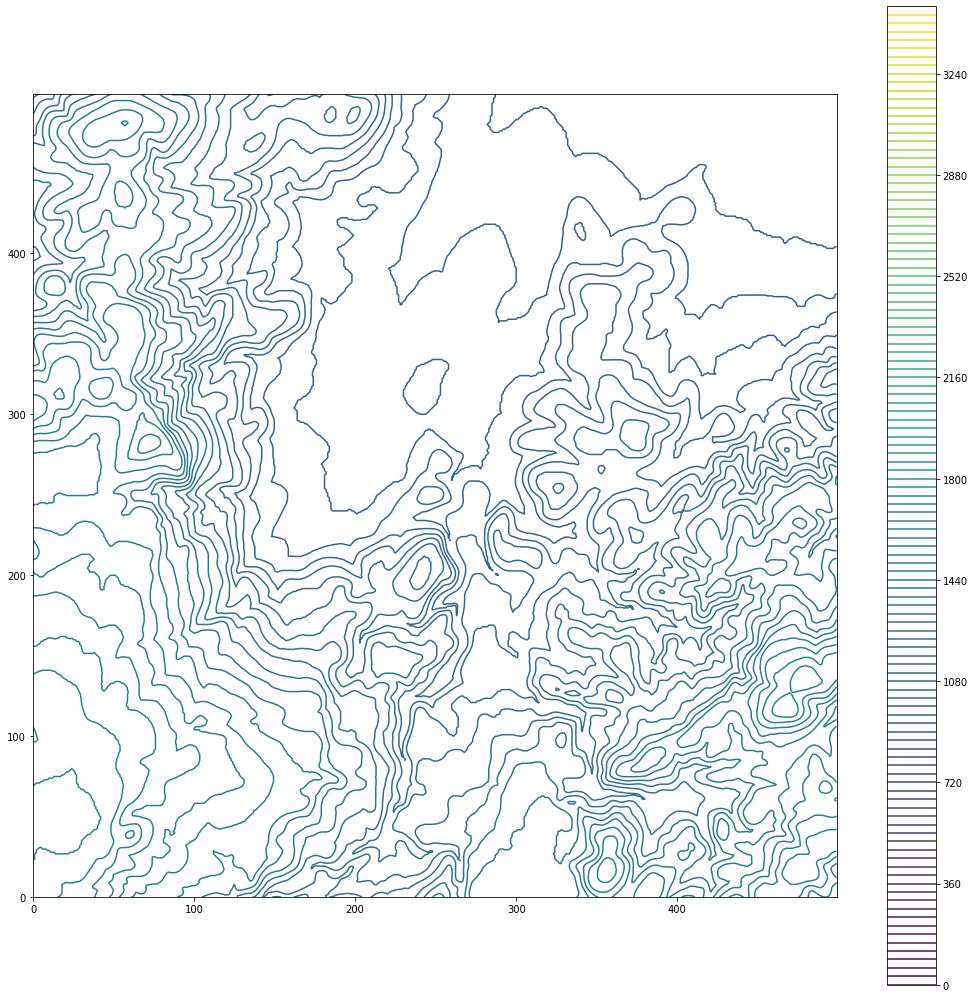

In [71]:
plt.figure(figsize = (18, 18))
plt.contour(data[2000:2500,500:1000],levels = list(range(0, 3500, 30)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

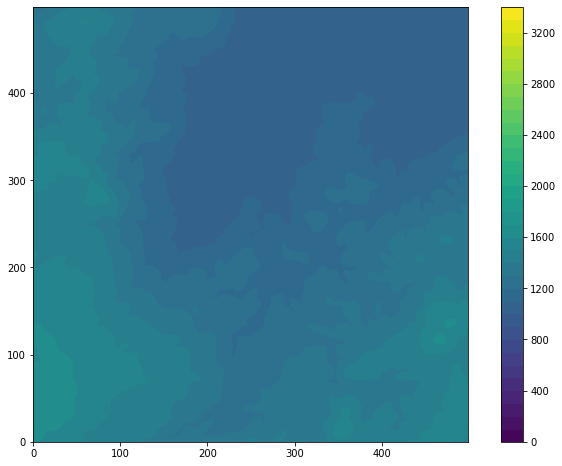

In [72]:
plt.figure(figsize = (12, 8))
plt.contourf(data[2000:2500,500:1000],levels = list(range(0, 3500, 100)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

In [73]:
geoTra = ds.GetGeoTransform()
print(geoTra)
resx = geoTra[1]
resy = geoTra[5]
xmin = geoTra[0]
xmax = geoTra[0] + resx*data.shape[1]
ymax = geoTra[3]
ymin = ymax + resy*data.shape[0]
print('xmin', xmin)
print('xmax', xmax)
print('ymin', ymin)
print('ymax', ymax)

(-99.4944141477947, 0.000138888889000001, 0.0, 19.1316786339504, 0.0, -0.000138888889000001)
xmin -99.4944141477947
xmax -98.6328863693277
ymin 18.332373077755395
ymax 19.1316786339504


0.000138888889000001

F = (x - xmin)/rex

C = (y - ymin)/resy

In [78]:
print((-99.2-xmin)/resx)
print()

2119.7818624259785


In [81]:
xminU = int((float(input('Xmin:'))-xmin)/resx)
xmaxU = int((float(input('Xmax:'))-xmin)/resx)
yminU = int(abs((float(input('Ymin:'))-ymin)/resy))
ymaxU = int(abs((float(input('Ymax:'))-ymin)/resy))

Xmin:-99.4944141477947
Xmax:-98.6328863693277
Ymin:18.332373077755395
Ymax:19.1316786339504


In [82]:
xminU,xmaxU,yminU,ymaxU

(0, 6203, 0, 5754)

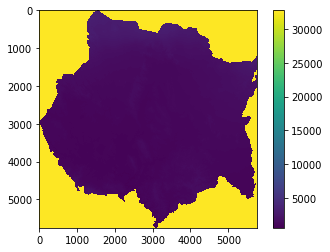

In [83]:
plt.imshow(data[xminU:xmaxU,yminU:ymaxU])
plt.colorbar()

In [88]:
print(xminU, yminU)
print('Elevacion Xmin,Ymin:', data[xminU,yminU])
#print('Elevacion Xmax,Ymax:', data[xmaxU,ymaxU])
xmaxU, ymaxU

0 0
Elevacion Xmin,Ymin: 32767


(6203, 5754)

Xmin:-99.3
Xmax:-98.7
Ymin:18.5
Ymax:18.7
Elevacion Xmin,Ymin: 32767
Elevacion Xmax,Ymax: 32767


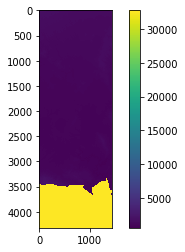

In [92]:
xminU = int((float(input('Xmin:'))-xmin)/resx)
xmaxU = int((float(input('Xmax:'))-xmin)/resx)
yminU = int(abs((float(input('Ymin:'))-ymin)/resy))
ymaxU = int(abs((float(input('Ymax:'))-ymin)/resy))

plt.imshow(data[xminU:xmaxU,yminU:ymaxU])
plt.colorbar()
print('Elevacion Xmin,Ymin:', data[xminU,yminU])
print('Elevacion Xmax,Ymax:', data[xmaxU,ymaxU])

### **Operaciones de datos Raster**

Apertura de bandas

In [0]:
import rasterio
b3 = gdal.Open('/content/drive/My Drive/Curso-RV-python/T14QMF_20181223T170719_B03_10m_geo_rec.tif')
b8 = gdal.Open('/content/drive/My Drive/Curso-RV-python/T14QMF_20181223T170719_B08_10m_geo_rec.tif')

In [94]:
b3
b8

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8a5b1b6f60> >

Extracción de datos

In [95]:
dataB3 = b3.ReadAsArray() # Separar el dataset de la matriz
dataB8 = b8.ReadAsArray()
dataB3.shape,dataB8.shape

((5292, 5400), (5292, 5400))

Calculo de indice NDWI
A través del cálculo del índice NDWI (Índice Diferencial de Agua Normalizado) podemos identificar masas de agua y zonas de elevada saturación de humedad por medio del análisis de imágenes satélite. De esta forma podemos emplear el índice como unidad de medida para determinar el estrés hídrico en vegetación, saturación de humedad en suelo o realizar delimitaciones directas de masas de agua como lagos y embalses.

Sentinel-2 
NDWI = (B3-B8)/(B3+B8)


In [98]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
ndwi = (dataB3 - dataB8)/(dataB3 + dataB8)
ndwi
np.nanmax(ndwi) # Devuelve el máximo de una matriz o el máximo a lo largo de un eje, ignorando cualquier NaN

65535.0

In [100]:
ndwi.shape

(5292, 5400)

Eliminación de nodata

In [102]:
ndwi = np.where(ndwi == 65535.0, np.nan,ndwi)
ndwi

array([[25.88356998, 24.69469198, 24.69469198, ..., 35.27605019,
        35.13478261, 38.08480565],
       [22.39639958, 20.86824769, 20.86824769, ..., 32.63617989,
        32.57214934, 36.66439909],
       [24.40521873, 19.62814539, 19.62814539, ..., 29.84590467,
        30.61859583, 35.496983  ],
       ...,
       [26.44471744, 27.1792175 , 28.43309859, ..., 37.10332951,
        35.77383592, 33.16984045],
       [30.70123692, 31.71799902, 27.72586873, ..., 36.50706614,
        34.39765458, 36.13822048],
       [30.71156592, 31.89512555, 27.23855523, ..., 34.84897519,
        36.10240627, 32.32865028]])

Graficación de indice

In [103]:
np.nanmax(ndwi), np.nanmin(ndwi)


(546.0333333333333, 0.0)

0.0

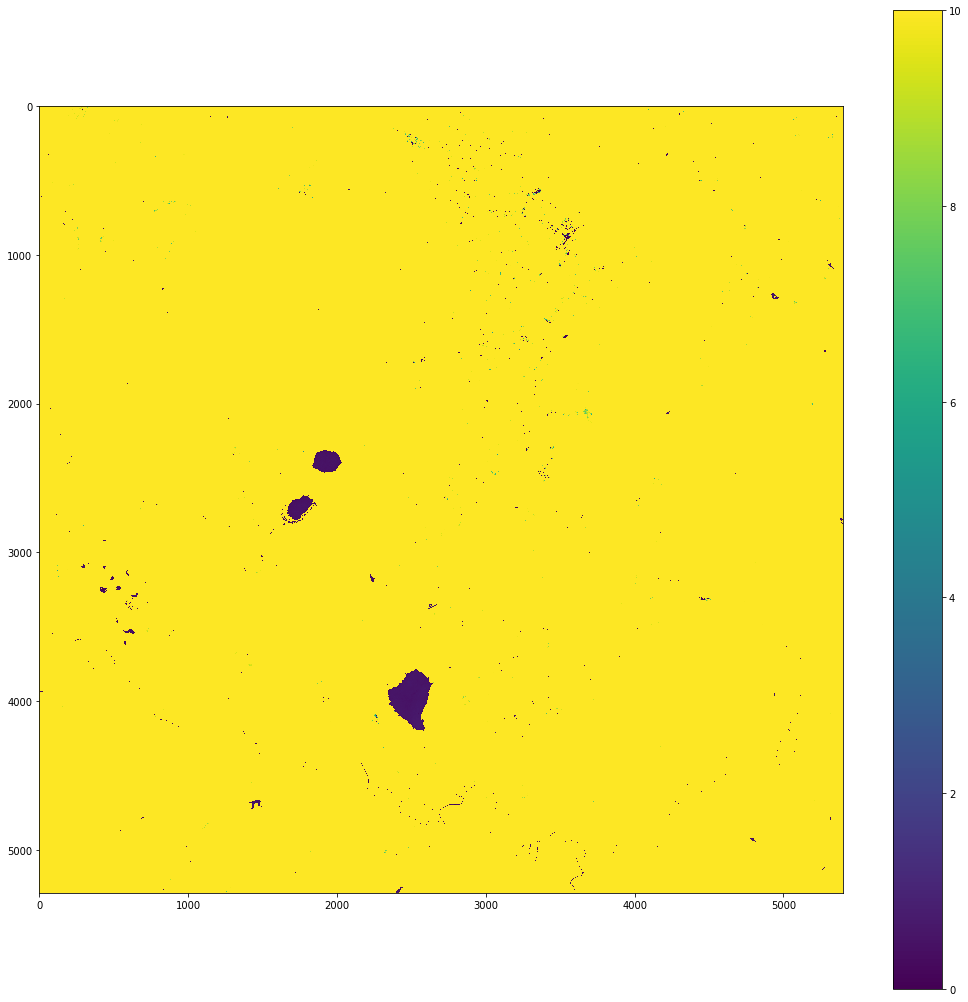

In [106]:
plt.figure(figsize=(18,18))
plt.imshow(ndwi,vmin=0,vmax=10)
plt.colorbar()
import numpy as np
np.nanmax(ndwi)
np.nanmin(ndwi)

### **Depuración datos raster**

Emascaramiento np.where

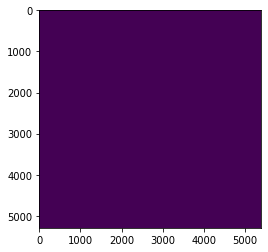

In [114]:
ndwi = np.where(ndwi > 10 , np.nan,1)
#ndwi = np.where(ndwi >= 10 , 0, 1)
#plt.imshow(ndwi, cmap='binary')
plt.imshow(ndwi)

### **Georreferencia y reproyección de datos Raster**

Creacion de archivo
```
dst_ds = gdal.GetDriverByName('GTiff').Create('tmp.tif', ny, nx, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(geotransform)    # Aplica la geotransformacion y la proyección
srs = osr.SpatialReference()            # Establece el ensamble
srs.ImportFromProj4("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs ") # Proyeccion UTM 14 N
dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
dst_ds.GetRasterBand(1).WriteArray(data)   # Escribe la banda al raster
dst_ds.FlushCache()                     # Escribe en el disco

dst_ds = None
```






In [0]:
from osgeo import osr

In [0]:
dst_ds = gdal.GetDriverByName('GTiff').Create('ndwi.tif', ndwi.shape[1],  ndwi.shape[0], 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(b3.GetGeoTransform())    # Aplica la geotransformacion y la proyección
srs = osr.SpatialReference()            # Establece el ensamble
srs.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs") # Proyeccion EPSG:4326
dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
dst_ds.GetRasterBand(1).WriteArray(ndwi)   # Escribe la banda al raster
dst_ds.FlushCache()                     # Escribe en el disco

dst_ds = None

**Reproyección gdalwarp**

In [117]:
ds = gdal.Open('ndwi.tif')
gdal.Warp('ndwi_UTM.tif',ds,options=gdal.WarpOptions(dstSRS='EPSG:32614'))

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8a816f97b0> >